In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [78]:
train=pd.read_csv('Final_Train.csv', encoding= 'unicode_escape')
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [79]:
train.shape

(5961, 7)

In [80]:
test=pd.read_csv('Final_Test.csv')
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [81]:
test.shape

(1987, 6)

# Creating completed Doctor dataset.
1. Since we have both train and test data we need to combine them and create single dataset for it.
2. It's been observed train data set has 'Fees' column which is missing from train data set and needs an update.
3. Miscellaneous_Info column can be dropped from the data set as it doesn't have any unique value for modelling.

In [82]:
# Concat train and test dataframes
data=pd.concat([train,test], axis=0)

In [83]:
data.shape

(7948, 7)

In [84]:
#data.drop(['Miscellaneous_Info','Place'], axis=1 ,inplace=True)
data.drop(['Miscellaneous_Info'], axis=1 ,inplace=True)
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250.0


In [85]:
data['Qualification']= data['Qualification'].replace(to_replace='[^a-zA-Z]', value='', regex=True)
data['Experience']=data['Experience'].replace(to_replace='[ years experience]', value='', regex=True)
data['Rating']=data['Rating'].replace(to_replace='[%$]', value='', regex=True)
data['Place']=data['Place'].replace(to_replace='[^a-zA-Z]', value='', regex=True)
data['Profile']=data['Profile'].replace(to_replace='[^a-zA-Z]', value='', regex=True)

data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMSMDHomeopathy,24,100,KakkanadErnakulam,Homeopath,100.0
1,BAMSMDAyurvedaMedicine,12,98,WhitefieldBangalore,Ayurveda,350.0
2,MBBSMSOtorhinolaryngology,9,NaN,MathikereBELBangalore,ENTSpecialist,300.0
3,BScZoologyBAMS,12,NaN,BannerghattaRoadBangalore,Ayurveda,250.0
4,BAMS,20,100,KeelkattalaiChennai,Ayurveda,250.0


In [86]:
# Checking which all columns have null values
data.isnull().sum().sort_values(ascending=False)

Rating           4392
Fees             1987
Place              31
Profile             0
Experience          0
Qualification       0
dtype: int64

In [87]:
data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [88]:
data['Fees'].fillna(data['Fees'].mean(), inplace=True)
data['Rating'].fillna(90, inplace=True)
data['Place'].fillna('Mumbai', inplace=True)


data['Experience'] = pd.to_numeric(data['Experience'])
data['Rating'] = pd.to_numeric(data['Rating'])



data.describe()

,Experience,Rating,Fees
count,7948.000000,7948.000000,7948.000000
mean,17.446653,92.054731,307.944640
std,11.201217,5.684871,165.338426
min,0.000000,7.000000,5.000000
25%,9.000000,90.000000,200.000000
50%,15.000000,90.000000,307.944640
75%,23.000000,96.000000,400.000000
max,66.000000,100.000000,950.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Experience     7948 non-null   int64  
 2   Rating         7948 non-null   int64  
 3   Place          7948 non-null   object 
 4   Profile        7948 non-null   object 
 5   Fees           7948 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 434.7+ KB


In [90]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

data['Qualification'] = le.fit_transform(data['Qualification'])
data['Place'] = le.fit_transform(data['Place'])
data['Profile'] = le.fit_transform(data['Profile'])


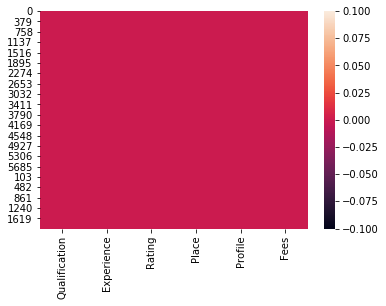

In [91]:
# Checking for null using HeatMap
sns.heatmap(data.isnull())

In [92]:
# plt.figure(figsize=(20,10)) 
# plt.bar(data['Experience'],data['Fees'])

# plt.ylabel('Fees')
# plt.xlabel('Experience')
# plt.show()

In [93]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[0.51834659, 0.58509347, 1.39770447, 0.47573417, 1.53362797,
        1.25777007],
       [1.2821502 , 0.48628607, 1.04587134, 1.75163955, 1.4836687 ,
        0.25437526],
       [1.2966323 , 0.75413095, 0.36146118, 0.15201462, 0.3267093 ,
        0.0480538 ],
       ...,
       [0.9827922 , 0.75413095, 0.36146118, 0.76841855, 0.93016863,
        0.        ],
       [1.12523015, 0.48628607, 1.04587134, 1.48164488, 0.88020937,
        0.        ],
       [0.74835743, 0.84341258, 0.36146118, 0.57555597, 0.27675003,
        0.        ]])

In [94]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([  55,  105,  110,  140,  183,  209,  275,  293,  309,  325,  333,
        372,  377,  458,  465,  585,  590,  692,  731,  787,  788,  815,
        911,  979,  987,  990,  998, 1009, 1018, 1170, 1240, 1303, 1314,
       1444, 1475, 1594, 1614, 1631, 1717, 1747, 1778, 1796, 1852, 1860,
       1877, 2023, 2062, 2089, 2161, 2165, 2252, 2262, 2277, 2281, 2323,
       2391, 2393, 2428, 2478, 2522, 2548, 2585, 2623, 2631, 2646, 2708,
       2715, 2726, 2738, 2758, 2829, 2833, 2962, 2991, 3093, 3120, 3126,
       3144, 3180, 3222, 3254, 3270, 3365, 3493, 3526, 3537, 3593, 3604,
       3608, 3615, 3627, 3661, 3766, 3820, 3861, 3960, 4040, 4058, 4135,
       4212, 4219, 4344, 4405, 4459, 4474, 4478, 4509, 4581, 4608, 4609,
       4730, 4775, 4808, 4825, 4835, 4851, 4880, 4971, 5028, 5127, 5195,
       5244, 5249, 5250, 5265, 5277, 5298, 5311, 5410, 5422, 5422, 5461,
       5531, 5587, 5612, 5615, 5637, 5663, 5720, 5807, 5862, 5892, 5963,
       5978, 6026, 6033, 6065, 6129, 6175, 6219, 6

In [95]:
# Removing the outliers having zscore value of more than 3.
doctor_data=data[(z<3).all(axis=1)]
doctor_data

,Qualification,Experience,Rating,Place,Profile,Fees
0,476,24,100,300,5,100.00000
1,72,12,98,889,0,350.00000
2,1436,9,90,466,3,300.00000
3,577,12,90,73,0,250.00000
4,2,20,100,343,0,250.00000
...,...,...,...,...,...,...
1982,50,10,90,75,0,307.94464
1983,1577,4,90,134,2,307.94464
1984,1270,9,90,629,4,307.94464
1985,155,12,98,34,1,307.94464


In [96]:
# Checking for skewed data
doctor_data.skew()

Qualification    0.270178
Experience       0.916927
Rating           0.239832
Place            0.130881
Profile          0.110577
Fees             0.813657
dtype: float64

In [97]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform


doctor_data['Rating']=boxcox1p(doctor_data['Rating'],0)
#restaurant_data['COST']=boxcox1p(restaurant_data['COST'],0.5)

doctor_data.skew()

Qualification    0.270178
Experience       0.916927
Rating           0.078900
Place            0.130881
Profile          0.110577
Fees             0.813657
dtype: float64

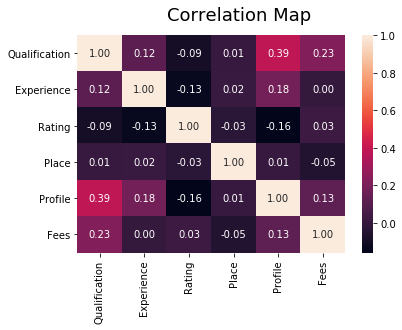

In [98]:
#plt.figure(figsize=(12,8)) 
sns.heatmap(doctor_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [99]:
# Setting x  by excluding Fees column which is y here for prediction.
x=doctor_data.drop(['Fees'],axis=1)
x

,Qualification,Experience,Rating,Place,Profile
0,476,24,4.615121,300,5
1,72,12,4.595120,889,0
2,1436,9,4.510860,466,3
3,577,12,4.510860,73,0
4,2,20,4.615121,343,0
...,...,...,...,...,...
1982,50,10,4.510860,75,0
1983,1577,4,4.510860,134,2
1984,1270,9,4.510860,629,4
1985,155,12,4.595120,34,1


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [101]:
# Settng Y
y=doctor_data['Fees']
y

0       100.00000
1       350.00000
2       300.00000
3       250.00000
4       250.00000
          ...    
1982    307.94464
1983    307.94464
1984    307.94464
1985    307.94464
1986    307.94464
Name: Fees, Length: 7761, dtype: float64

In [102]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  91  is  0.058728056170801346


In [103]:
# Setting the test x & y values and using the random state from above step which is 56.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=43)

In [104]:
train_x.shape

(5820, 5)

In [105]:
train_y.shape

(5820,)

In [106]:
test_x.shape

(1941, 5)

In [107]:
test_y.shape

(1941,)

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=92)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [110]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [111]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 128.53114903271296
Mean squared error 28820.001748959086
Root Mean absolute error 169.76454797441983
Score:  0.022391253130483957


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 128.53114903271296
Mean squared error 28820.001748959086
Root Mean absolute error 169.76454797441983
Score:  0.033987109408126215


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 128.53114903271296
Mean squared error 28820.001748959086
Root Mean absolute error 169.76454797441983
Score:  0.06862691060666049




In [112]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,2.239125
1,SVR,3.398711
2,LinearRegression,6.862691
3,DecisionTreeRegressor,-79.664894
4,Lasso,6.862622
5,Ridge,6.862688
6,ElasticNet,6.861822
7,RandomForestRegressor,4.511630
8,AdaBoostRegressor,8.547601
9,GradientBoostingRegressor,12.793792


# From the above table DecisionTreeRegressor seems to be the best model with over 79% accuracy.

In [113]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
doctor_data.to_csv('DoctorFee_Predict.csv')
predictData

,0
0,286.994410
1,371.828094
2,393.699123
3,286.994410
4,299.351236
...,...
1936,263.948380
1937,255.285548
1938,286.994410
1939,274.313946


In [114]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(DT,"DT_DoctorFee.pkl")

['DT_DoctorFee.pkl']